Ver si el volumen de datos es continuo y mas o menos uniforme. Ver maximos y minimos de missing seconds per day.
Podria ser que perdiesemos hasta el 20% del volumen del dataset por culpa de esto?

In [3]:
# TO-DO 1: Create data for empty seconds if there are lags where the second difference is > 1 and it's not due to a day of difference
# TO-DO 2: Use same parsing than above (by timestamp ranges) at the end of this notebook for removing last minute and first minute (60 rows) of the day.
# IMPORTANT! WE DON'T NEED TO DELETE THE FIRST AND LAST MINUTE ANYMORE, WE CAN KEEP ONE HOUR BEFORE AND AFTER TILL THE END
# TO DECIDE THE LABEL THIS WAY, AND THEN DELETE THIS EXTRA TIMES BUT HAVE LABELS FOR THE FIRST N AND LAST INSTANCES.
# TO-DO 3: Check flag 'suspicious'.
# TO-DO 4: Check avg number/plot of amount missing records/values daily in terms of proportion, 
#           to measure the real impact in the dataset and report it in the paper.
# TO-DO 5: Propagate properly the milliseconds variable when resampling.

In [2]:
# Data preparation at one-second level for Ph.D thesis
# @author: Andres L. Suarez-Cetrulo
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

#Alpha Vantage API to download 15 days of minute data (only if required)
# from alpha_vantage.timeseries import TimeSeries
# apikey='E8HE93TKWNLCACEU'
# ts = TimeSeries(key=apikey)

# Using TALib abstract API to create a dictionary of technical indicators to iterate later.
from talib import abstract

In [6]:
dataframes=[]

# Dec 2016 (devset) + Jan to March 2017
files = [#"20161201", "20161202", "20161205", "20161206", "20161207", "20161208", 
         #"20161209", "20161212", "20161213", "20161214", "20161215", "20161216", 
         #"20161219", "20161220", "20161221", "20161222", "20161223", "20161227", 
         #"20161228", "20161229", "20161230",
         # Q1 Bank holidays
         # "20170102" is New Year's day moved to Monday
         # "20170115" is Mr Luther King day 
         # "20170219" is President's day
         "20170103", "20170104", "20170105", "20170106", "20170109", "20170110", 
         "20170111", "20170112", "20170113", 
         "20170117", "20170118", "20170119", "20170120", "20170123", "20170124", 
         "20170125", "20170126", "20170127", "20170130", "20170131", "20170201", 
         "20170202", "20170203", "20170206", "20170207", "20170208", "20170209", 
         "20170210", "20170213", "20170214", "20170215", "20170216", "20170217", 
         "20170221", "20170222", "20170223", "20170224", "20170227", "20170228", 
         "20170301", "20170302", "20170303", "20170306", "20170307", "20170308", 
         "20170309", "20170310", "20170313", "20170314", "20170315", "20170316", 
         "20170317", "20170320", "20170321", "20170322", "20170323", "20170324", 
         "20170327", "20170328", "20170329", "20170330", "20170331"]

for file in files:
    csv_path="/home/cetrulin/Desktop/Andres/data/raw/quantquote/1-second-level/SPY/"+file+"/spy.csv"
    new_df=pd.read_csv(csv_path, sep=',', parse_dates=True,infer_datetime_format=True, header=0)
    new_df.columns = ['milliseconds','open','high','low','close','volume','suspicious']
    new_df=new_df.astype('double', copy=False) # All values as Double
    new_df['datetime'] = pd.Timestamp(file+' 00:00:00') # Get date from foldername
    dataframes.append(new_df)

# concat all dataframes in a single one
df=pd.concat(dataframes) # 57375 rows until 2017-11-18 
df=df.drop_duplicates(['milliseconds','open','high','low','close','volume','suspicious','datetime']) # 21087 rows without duplicates

# Parse datetime at 00:00 to timestamp and multiply by 1000 to have milliseconds. 
# Then add raw timestamp with milliseconds from 00:00
df['timestamp'] = ((df.datetime.values.astype(np.int64) // 10 ** 9) * 1000) + df.milliseconds
# Timestamp in milliseconds to readable datetime
df['timestamp_r'] = pd.to_datetime(df.timestamp,unit='ms')

#df.drop also drops the selected column (if value=1) or rows (if =0) #df = df.drop(df.columns[[0]], 1)
#df = df.drop('milliseconds', 1)
#df = df.drop('datetime', 1)

# Save raw concatenated file in analysis
#df.to_csv('/home/cetrulin/Desktop/Andres/data/analysis/S&P500/SPY_seconds_['+str(files[0])+'_to_'+str(files[len(files)-1])+'].csv', sep=';', compression='gzip') #encoding='utf-8')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 52: invalid start byte

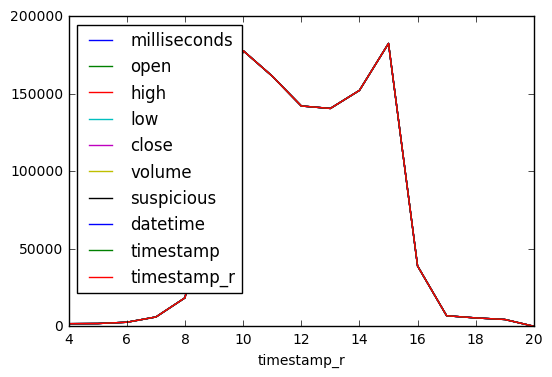

In [34]:
# Analyzing density of instances per hour
%matplotlib inline
df.groupby( [df.timestamp_r.dt.hour] ).count().plot()


In [35]:
df

,milliseconds,open,high,low,close,volume,suspicious,datetime,timestamp,timestamp_r
0,14403000.0,2248000.0,2248000.0,2248000.0,2248000.0,20.0,0.0,2017-01-03,1.483416e+12,2017-01-03 04:00:03
1,14405000.0,2248000.0,2248000.0,2244900.0,2244900.0,250.0,0.0,2017-01-03,1.483416e+12,2017-01-03 04:00:05
2,14406000.0,2244900.0,2244900.0,2243000.0,2243000.0,200.0,0.0,2017-01-03,1.483416e+12,2017-01-03 04:00:06
3,14437000.0,2244400.0,2244400.0,2244400.0,2244400.0,35.0,0.0,2017-01-03,1.483416e+12,2017-01-03 04:00:37
4,14450000.0,2248300.0,2248300.0,2244400.0,2248300.0,774.0,0.0,2017-01-03,1.483416e+12,2017-01-03 04:00:50
5,14468000.0,2248300.0,2248300.0,2248300.0,2248300.0,20.0,0.0,2017-01-03,1.483416e+12,2017-01-03 04:01:08
6,14476000.0,2248500.0,2248700.0,2248500.0,2248700.0,50.0,0.0,2017-01-03,1.483416e+12,2017-01-03 04:01:16
7,14477000.0,2248300.0,2248300.0,2248300.0,2248300.0,4206.0,0.0,2017-01-03,1.483416e+12,2017-01-03 04:01:17
8,14494000.0,2246000.0,2246000.0,2246000.0,2246000.0,1700.0,0.0,2017-01-03,1.483416e+12,2017-01-03 04:01:34
9,14526000.0,2247700.0,2247700.0,2247700.0,2247700.0,94.0,0.0,2017-01-03,1.483416e+12,2017-01-03 04:02:06


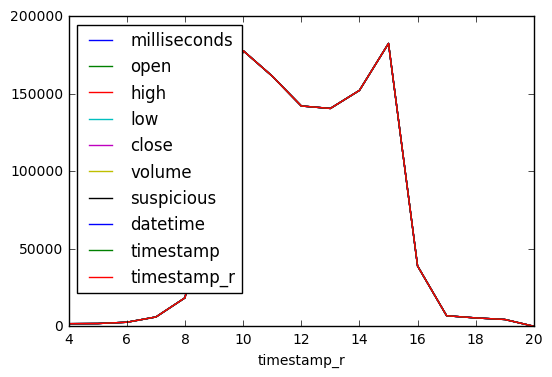

In [36]:
%matplotlib inline
df.groupby( [df.timestamp_r.dt.hour] ).count().plot()


In [37]:
# Only keep market hours. Decide where should the cut-off be. I get data from 4am to 8pm...
# Accoring to Quantquode, they may give hours before and after market if they have them. 
# But they give market hours from 9:30H to 16:00H. This is translated to 13.30H to 20:00H in Dublin time.
# by now I get prices from 9H to 20H as the granularity before 9H is not that good. 
# Ideally it should be only market hours, but I'm too afraid to loose valuable data.

# 08:00h = 28800000 in ms | 09:00h corresponds to millisecond 32400000 | 09:30h = 34200000 in ms
# 16:00h = 57600000 in ms | 17:00h = 61200000 in ms | 20:00h corresponds to millisecond 72000000

df=df.loc[(df['milliseconds'] >= 34200000.0) & (df['milliseconds'] <= 57600000.0)]
df
#df = df.drop('milliseconds', 1) # not drop. needed for parsing after

,milliseconds,open,high,low,close,volume,suspicious,datetime,timestamp,timestamp_r
966,34200000.0,2250400.0,2251000.0,2250400.0,2250800.0,802277.0,0.0,2017-01-03,1.483436e+12,2017-01-03 09:30:00
967,34201000.0,2250900.0,2251000.0,2250600.0,2250900.0,50318.0,0.0,2017-01-03,1.483436e+12,2017-01-03 09:30:01
968,34202000.0,2250900.0,2251200.0,2250699.0,2251000.0,48837.0,0.0,2017-01-03,1.483436e+12,2017-01-03 09:30:02
969,34203000.0,2251000.0,2251000.0,2250650.0,2250900.0,27614.0,0.0,2017-01-03,1.483436e+12,2017-01-03 09:30:03
970,34204000.0,2250900.0,2250900.0,2250600.0,2250900.0,20254.0,0.0,2017-01-03,1.483436e+12,2017-01-03 09:30:04
971,34205000.0,2250900.0,2250900.0,2250705.0,2250800.0,26343.0,0.0,2017-01-03,1.483436e+12,2017-01-03 09:30:05
972,34206000.0,2250800.0,2251150.0,2250700.0,2250954.0,21926.0,0.0,2017-01-03,1.483436e+12,2017-01-03 09:30:06
973,34207000.0,2250800.0,2251200.0,2250700.0,2250800.0,4386.0,0.0,2017-01-03,1.483436e+12,2017-01-03 09:30:07
974,34208000.0,2250800.0,2251100.0,2250600.0,2250800.0,26174.0,0.0,2017-01-03,1.483436e+12,2017-01-03 09:30:08
975,34209000.0,2250918.0,2250918.0,2250700.0,2250750.0,2747.0,0.0,2017-01-03,1.483436e+12,2017-01-03 09:30:09


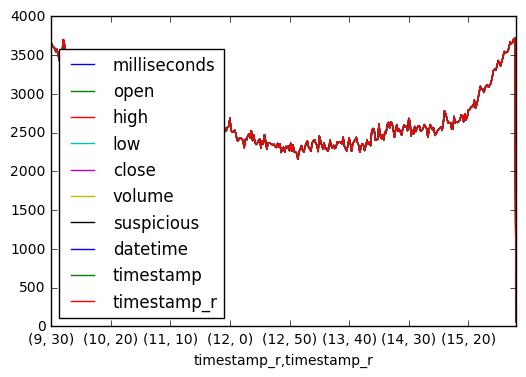

In [38]:
# Analyzing density of instances per (hour,minute) tuple. 
%matplotlib inline
#df.groupby( [df.timestamp_r.dt.hour, df.timestamp_r.dt.minute]).count()
df.groupby( [df.timestamp_r.dt.hour, df.timestamp_r.dt.minute]).count().plot()
# The expected output is to see how there is more variation at the start and closing of the market

In [ ]:
# Index dataframe by its actual readable timestamp
df.index=df['timestamp_r']

In [ ]:
# Missing data handling

# Disabled by default
fill_missing_values = 0

# This would be the logic for downsampling/go to minute level from seconds.
# For seconds, when upsampling like in our quantquote data, the values will be NULL anyway
ohlc_dict = {'open':'first','high':'max','low':'min','close':'last','volume':'sum'}

# Volume at 0 for missing seconds and propagate last closing price to the 4 price columns.
if (fill_missing_values == 1):
    test=df.resample('1s').agg(ohlc_dict)
    test['volume'] = test['volume'].fillna(0) 
    test['close'] = test['close'].ffill()     
    test['open'] = test['open'].fillna(test['close']) 
    test['low'] = test['low'].fillna(test['close']) 
    test['high'] = test['high'].fillna(test['close'])
    #test['milliseconds'] = test['milliseconds'].fillna(test['milliseconds'].shift(-1) + 1000)  # test this
    df=test

# Propagate all columns
elif (fill_missing_values == 2):
    test=df.resample('1s').agg(ohlc_dict)
    test['volume'] = test['volume'].ffill()
    test['close'] = test['close'].ffill()     
    test['open'] = test['open'].ffill()
    test['low'] = test['low'].ffill()
    test['high'] = test['high'].ffill()
    #test['milliseconds'] = test['milliseconds'].fillna(test['milliseconds'].shift(-1) + 1000) # test this
    df=test

In [ ]:
minute_level = False

if (minute_level == True):
    df = df.resample('1Min').agg({'open': 'first', 
                                'high': 'max',
                                'low': 'min', 
                                'close': 'last',
                                'volume': 'sum'})

In [ ]:
#Add parameters to transform in TS
timeseries=['low','close','open','high','volume']
#Length of the TS. How many values do we keep per serie. 
# e.g. 1 -> t / 2 -> t,t-1 / 3 -> t,t-1,t-2 / 4 -> t,t-1,t-2,t-3

use_OHLCV_timeseries = False
OHLCV_timeseries_lenght = 4

# Add lagged times
if (use_OHLCV_timeseries == True):
    for column in timeseries:
        #df[column+'_t']=df[column]
        for i in range(1,length):
            df[column+'_t-'+str(i)]=df[column].shift(i) #it could also be sorted and group by if needed
        #del drops the delected df column
        #del df[column]

In [ ]:
# Creating a dictionary of technical indicators using TALib abstract API
indicator = {}

# Add as many indicators as necessary: see all indicators in https://mrjbq7.github.io/ta-lib/
indicator['sma']=abstract.Function('sma') # Simple Moving Average
indicator['ema']=abstract.Function('ema') # Exponential Moving Average
indicator['mom']=abstract.Function('mom') # Momentum
indicator['stoch']=abstract.Function('stoch') # Stochastic (returns K and D)
indicator['macd']=abstract.Function('macd') # Moving Average Convergence/Divergence
indicator['rsi']=abstract.Function('rsi') # Relative Strength Index
indicator['willr']=abstract.Function('willr') # Williams' %R
indicator['adosc']=abstract.Function('adosc') # Chaikin A/D Oscillator
indicator['cci']=abstract.Function('cci') # Commodity Channel Index

In [17]:
df

,high,close,open,low,volume
timestamp_r,,,,,
2016-12-01 09:30:00,2207300.0,2206600.0,2206900.0,2204700.0,1178439.0
2016-12-01 09:31:00,2207300.0,2205630.0,2206700.0,2205200.0,424952.0
2016-12-01 09:32:00,2206000.0,2205600.0,2205700.0,2205100.0,326427.0
2016-12-01 09:33:00,2205700.0,2204400.0,2205600.0,2204300.0,336613.0
2016-12-01 09:34:00,2204500.0,2204200.0,2204500.0,2203400.0,386054.0
2016-12-01 09:35:00,2204700.0,2203750.0,2204300.0,2203750.0,346120.0
2016-12-01 09:36:00,2204200.0,2203400.0,2203800.0,2203200.0,304161.0
2016-12-01 09:37:00,2203400.0,2203100.0,2203300.0,2202600.0,307273.0
2016-12-01 09:38:00,2204200.0,2204000.0,2203100.0,2202700.0,271684.0


In [ ]:
use_extra_indicators = False

if (use_extra_indicators):
    # extra columns
    indicator['adx']=abstract.Function('adx') # Average Directional Movement Index
    indicator['aroon']=abstract.Function('aroon') # Aroon
    indicator['bbands']=abstract.Function('bbands') # Bollinger Bands
    indicator['obv']=abstract.Function('obv') # On Balance Volume
    # 
    indicator['trima']=abstract.Function('trima') # Triangular Moving Average
    indicator['roc']=abstract.Function('roc') # Rate of change : ((price/prevPrice)-1)*100
    indicator['rocr']=abstract.Function('rocr') # Rate of change ratio: (price/prevPrice)
    indicator['stochf']=abstract.Function('stochf') # Stochastic fast (returns K and D)
    indicator['adosc']=abstract.Function('adosc') # Chaikin A/D Oscillator
    indicator['medprice']=abstract.Function('medprice') # Median Price
    indicator['typprice']=abstract.Function('typprice') # Typical Price
    indicator['wclprice']=abstract.Function('wclprice') # Weighted Close Price
    indicator['atr']=abstract.Function('atr') # Average True Range
    indicator['macdfix']=abstract.Function('macdfix') # #Moving Average Convergence/Divergence Fix 12/26
    indicator['mfi']=abstract.Function('mfi') # Money Flow Index

# Show the descriptions
#for ind in list(indicator.values()):
#    print('===============================')
#    print(ind)
#    print('===============================')
#    print()

In [ ]:
# all the numbers here and below assume a default time period for ta params of 10 mins averages
# change the other numbers (params of 5min and 20min and theremoval of 20 first mins of the day below) if the mins number is changed.
# in that case change as well the time tag '_10' with the corresponding one.
default_timerange=10 #600 # 10

# ###########################################
# Iterate and run list of indicators selected
# All of them produced for 25 prior mins of data 
# ###########################################
for key in list(indicator.keys()):
    # For indicators that only return one column (this will need to be modified depending on the selection of indicators)
    if key in ['ema','sma','trima']:
        df[key+'_'+str(default_timerange/2)]=indicator[key](df, timeperiod=(default_timerange/2)) 
        df[key+'_'+str(default_timerange)]=indicator[key](df, timeperiod=(default_timerange)) 
        df[key+'_'+str(default_timerange*2)]=indicator[key](df, timeperiod=(default_timerange*2))     
    elif key not in ['bbands','aroon','stoch','macd','macdfix','stochf']:
        df[key+'_'+str(default_timerange)]=indicator[key](df, timeperiod=(default_timerange))
    # Otherwise check the list of columns and return all
    else: 
        key_output=indicator[key](df, timeperiod=(default_timerange)) #, price='close')
        for j in range(0,len(list(key_output.columns))):
            df[key+'_'+key_output.columns[j]]=key_output[[j]]
            
df

In [ ]:
# Convert timestamp from GMT to US time (not working)
#import pytz
#eastern = pytz.timezone('US/Eastern')
#df['date']=df['date'].tz_localize(pytz.utc).tz_convert(eastern)
#print(df)

# Creating label/y to be predicted

# Ten minutes ahead cloasing price as value y to predict
#df['close_t+10']=df['close'].shift(-10)
df['close_t+1']=df['close'].shift(-1)

def func(row):
    if row['close_t+1'] > row['close']:
        return 1
    else:
        return 0

df['label'] = df.apply(func, axis=1)
df

In [ ]:
df

In [ ]:
from pandasql import *

%matplotlib inline

query  = """
SELECT ()
FROM
  df l
WHERE
    l.event LIKE '%RECURRING DRIFT%';
"""
result = pysqldf(query)


In [21]:
# Remove/drop serious information

# At second level we still need to filter out the first minute of the day in order to avoid noise.
# Although we have prices from 4am, these may come from missing transactions or systems that froze the previous day, 
# so including them even for the calculation of the indicators in the first row is not a good idea.
# This may include noise in the model. 
# Therefore, in order to have cleaner data to go with, we exclude the first minute for each day.

# Way to do so with the Quantquode data
# First 35s removed for Technical Indicators. 
# Last second of a day corresponds to the up&down after market hours.
# As we only should consider market hours for predictions, we delete these rows too.
if (minute_level == True):
    df=df.dropna() # TO-DO this should work. Check why it does only work for about 300 rows...
else:
    df=df.set_index('timestamp_r').between_time('09:30:35', '15:59:59', include_end=True)
    #df=df.set_index('timestamp_r').between_time('09:40:30', '15:59:59', include_end=True)

# Drop columns that won't be in our data model
df = df.drop('milliseconds', 1) # TO-DO: check why does this crash..
df = df.drop('timestamp', 1)
df = df.drop('open', 1)
df = df.drop('high', 1)
df = df.drop('low', 1)
df = df.drop('close', 1)
df = df.drop('volume', 1)
df = df.drop('suspicious', 1)
df = df.drop('close_t+1', 1) 
df = df.drop('macd_macdsignal', 1) 
df = df.drop('macd_macdhist', 1) 

ValueError: labels ['milliseconds'] not contained in axis

In [ ]:
df

In [16]:
# Reindex to sort the columns in the desired order (ONLY IF REQUIRED) - IT DOESNT WORK YET
#df = df.reindex(['sma_5','ema_5','sma_20','ema_20','sma_10','ema_10','cci_10','adosc_10', \
#                'macd_macd','stoch_slowk','stoch_slowd','rsi_10','mom_10','willr_10','willr_10'], axis=1)

# Start and end dates of devset and test&trainset
dev_startdate    = '2016-12-01'
dev_enddate      = '2017-01-01'
ttrain_startdate = dev_enddate
ttrain_enddate   = '2017-03-31'

# Start and end of market hours
market_starttime = '09:30:00'
market_endtime   = '16:00:00'

# Split in devset and trainset
dev=df.loc[(df.index >= dev_startdate+' '+market_starttime) & (df.index <= dev_enddate+' '+market_endtime)]
ttrain=df.loc[(df.index >= ttrain_startdate+' '+market_starttime) & (df.index <= ttrain_enddate+' '+market_endtime)]

# preview
dev

,ema_300,ema_600,ema_1200,rsi_600,willr_600,adosc_600,macd_macd,cci_600,mom_600,stoch_slowk,stoch_slowd,sma_300,sma_600,sma_1200,label
timestamp_r,,,,,,,,,,,,,,,
2016-12-01 09:40:30,2.203837e+06,2.204449e+06,NaN,47.225896,-68.085106,15402.750400,55.132840,-26.692752,-2600.0,1.000000e+02,83.333333,2.203620e+06,2.204436e+06,NaN,0
2016-12-01 09:40:31,2.203838e+06,2.204447e+06,NaN,47.135096,-70.212766,22256.039848,49.674476,-33.678373,-2300.0,8.333333e+01,88.888889,2.203618e+06,2.204432e+06,NaN,0
2016-12-01 09:40:32,2.203839e+06,2.204445e+06,NaN,47.044494,-72.340426,23036.381909,36.854682,-38.295900,-2200.0,5.666667e+01,80.000000,2.203617e+06,2.204428e+06,NaN,0
2016-12-01 09:40:33,2.203838e+06,2.204443e+06,NaN,46.954090,-74.468085,22156.017427,18.413479,-46.547943,-2300.0,3.166667e+01,57.222222,2.203616e+06,2.204425e+06,NaN,0
2016-12-01 09:40:34,2.203838e+06,2.204441e+06,NaN,46.906236,-75.595745,19744.266736,-0.472518,-48.861719,-2253.0,1.891667e+01,35.750000,2.203613e+06,2.204421e+06,NaN,0
2016-12-01 09:40:35,2.203836e+06,2.204438e+06,NaN,46.773800,-78.723404,13849.935387,-26.990350,-54.669456,-2500.0,1.225000e+01,20.944444,2.203611e+06,2.204417e+06,NaN,1
2016-12-01 09:40:36,2.203835e+06,2.204436e+06,NaN,46.876006,-76.595745,11621.851163,-39.481638,-54.506678,-2400.0,1.344048e+01,14.869048,2.203608e+06,2.204413e+06,NaN,0
2016-12-01 09:40:37,2.203834e+06,2.204433e+06,NaN,46.876006,-76.595745,9653.830239,-48.818327,-51.917228,-2300.0,2.285714e+01,16.182540,2.203606e+06,2.204409e+06,NaN,0
2016-12-01 09:40:38,2.203833e+06,2.204431e+06,NaN,46.855243,-77.085106,8348.109839,-57.411821,-54.702733,-2323.0,3.569048e+01,23.996032,2.203603e+06,2.204405e+06,NaN,0


In [17]:
# Export processed data
output_csv_path="/home/cetrulin/Desktop/Andres/data/analysis/S&P500/"
#ttrain_filename="test_SPY_seconds_ttrainset_["+str(datetime.date.today())+"].csv"
#ttrainindex_filename="test_SPY_seconds_ttrainindex_["+str(datetime.date.today())+"].txt"
ttrain_filename="SPY_seconds_ttrainset_["+str(datetime.date.today())+"].csv"
ttrainindex_filename="SPY_seconds_ttrainindex_["+str(datetime.date.today())+"].txt"
#dev_filename="test_SPY_seconds_devset_["+str(datetime.date.today())+"].csv"
#devindex_filename="test_SPY_seconds_devsetindex_["+str(datetime.date.today())+"].txt"
dev_filename="SPY_seconds_devset_["+str(datetime.date.today())+"].csv"
devindex_filename="SPY_seconds_devsetindex_["+str(datetime.date.today())+"].txt"

ttrain.to_csv(output_csv_path+ttrain_filename, sep=',', encoding='utf-8', index=False)
np.savetxt(output_csv_path+ttrainindex_filename, np.c_[ttrain.index.values], fmt='%s')

dev.to_csv(output_csv_path+dev_filename, sep=',', encoding='utf-8', index=False)
np.savetxt(output_csv_path+devindex_filename, np.c_[dev.index.values], fmt='%s')

Resampling examples

In [32]:
# This would be the logic for downsampling/go to minute level from seconds
ohlc_dict = {'open':'first','high':'max','low':'min','close':'last','volume':'sum'}

# test=df.resample('1s').apply(np.sum)  
# test=df.resample('1s').ffill().bfill() 
# test=df.resample('1s').fillna(method='ffill').fillna(method='bfill')
test=df.resample('1s').agg(ohlc_dict) 
testcase=test.loc[(test.index >= '2016-12-01 09:31:51') & (test.index <= '2016-12-01 09:31:54')]
testcase

#test.to_csv('/home/cetrulin/Desktop/Andres/data/analysis/S&P500/SPY_seconds_['+str(files[0])+'_to_'+str(files[len(files)-1])+'].csv.gz', sep=';', compression='gzip') #encoding='utf-8')
#df.resample('1s')

,high,close,open,low,volume
timestamp_r,,,,,
2016-12-01 09:31:51,2205785.0,2205785.0,2205785.0,2205785.0,212.0
2016-12-01 09:31:52,NaN,NaN,NaN,NaN,NaN
2016-12-01 09:31:53,NaN,NaN,NaN,NaN,NaN
2016-12-01 09:31:54,2205700.0,2205700.0,2205700.0,2205600.0,2116.0


In [46]:
# HERE WE ARE CREATING SOMETHING FROM THE FUTURE. THEREFORE IT DOESN'T EXIST YET. 
# WE WOULD RELY ON THE NEXT SECOND TO TAG BOTH UP&DOWN AND ALSO CLOSE PRICE IN CASE OF GAP
test=df.resample('1s').agg(ohlc_dict)#.dropna(how='any')
test['volume'] = test['volume'].fillna(0) 
test['open'] = test['open'].fillna(test['close'].ffill()) 
test['low'] = test['low'].fillna(test['close'].ffill()) 
test['high'] = test['high'].fillna(test['close'].ffill())
test['close'] = test['close'].fillna(test['open'].shift(-1))    

#testcase=test.loc[(test.index >= '2016-12-01 09:31:51') & (test.index <= '2016-12-01 09:31:54')]
#testcase=test.loc[(test.index >= '2016-12-01 09:39:10') & (test.index <= '2016-12-01 09:39:13')]
testcase=test.loc[(test.index >= '2016-12-01 09:39:52') & (test.index <= '2016-12-01 09:39:56')]
testcase

,high,close,open,low,volume
timestamp_r,,,,,
2016-12-01 09:39:52,2203550.0,2203500.0,2203550.0,2203500.0,2367.0
2016-12-01 09:39:53,2203500.0,2203500.0,2203500.0,2203500.0,0.0
2016-12-01 09:39:54,2203500.0,2203500.0,2203500.0,2203500.0,0.0
2016-12-01 09:39:55,2203500.0,2203400.0,2203500.0,2203500.0,0.0
2016-12-01 09:39:56,2203400.0,2203400.0,2203400.0,2203400.0,1.0


In [ ]:
# Favorite way to do this: asuarez
test=df.resample('1s').agg(ohlc_dict)#.dropna(how='any')
test['volume'] = test['volume'].fillna(0) 
test['close'] = test['close'].ffill()     
test['open'] = test['open'].fillna(test['close']) 
test['low'] = test['low'].fillna(test['close']) 
test['high'] = test['high'].fillna(test['close'])

testcase=test.loc[(test.index >= '2016-12-01 09:39:52') & (test.index <= '2016-12-01 09:39:56')]
testcase

Deprecated code for technical indicators

In [24]:
# Add SMA, EMA and TRIMA for extra times
#df['sma_5']=indicator['sma'](df, timeperiod=5) 
#df['ema_5']=indicator['ema'](df, timeperiod=5)
#df['trima_5']=indicator['trima'](df, timeperiod=5) 
#df['sma_20']=indicator['sma'](df, timeperiod=20) 
#df['ema_20']=indicator['ema'](df, timeperiod=20) 
#df['trima_20']=indicator['trima'](df, timeperiod=20) 